### Osama Kamal | SPARKS Intern for Data Science and Business Analytics

## Task 1: Prediction Using Supervised ML

We are going to implement simple Linear Regression on the dataset that consists of Hours Studied vs Scores obtained by students. Variable to be predicted (Dependant) is Scores, whereas, Hours studied is Independant variable

### Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Getting Data

In [3]:
import os
file_path = os.path.abspath('D:\Jupyter Notebooks\GRIP\hoursstudy.csv')
print(file_path)

D:\Jupyter Notebooks\GRIP\hoursstudy.csv


In [4]:
data = pd.read_csv('hoursstudy.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [5]:
data.shape # Gives the number of rows and columns in the dataset

(25, 2)

In [6]:
data.dtypes # Gives the data types of each column

Hours     float64
Scores      int64
dtype: object

In [7]:
data.describe() # Gives a statistical summary of the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking the correlation between the variables 

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


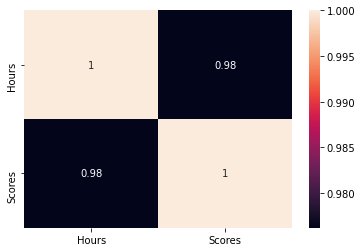

In [28]:
# Visualizing correlation with Seaborn Heatmap

corr=data.corr()
sns.heatmap(corr, annot=True)

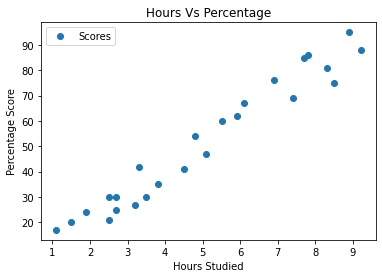

In [29]:
# Visualizing the distribution of scores using Scatter Plot

data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

We can clearly see a positive correlation between number of hours studied and the marks achieved

### Building the Linear Regression Model

Scores column is the depandant variable (vairable to be predicted), whereas
the Hours studied is the independant variable. So first, performing Train-Test split

In [82]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,
                                                    random_state=0)

### Training and Predicting the Model 

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lrmodel = LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

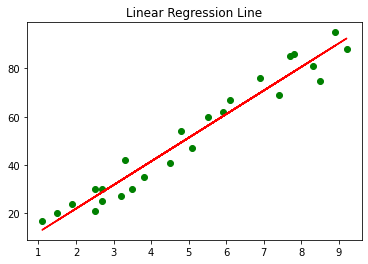

In [87]:
# Plotting the Regression Line

line = lrmodel.coef_*x + lrmodel.intercept_

plt.scatter(x,y,color='green')
plt.plot(x,line, color='red')
plt.title('Linear Regression Line')
plt.show()

In [88]:
predictions = lrmodel.predict(x_test)
predictions

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [89]:
# Comparing Actual Vs Predicted Scores
df = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### What will be the score if a student studies for 9.25 hrs/day? 

In [94]:
sample = lrmodel.predict([[9.25]])
print("If a student studies for 9.25 hours/day, he may obtain a score of",
      sample[0].round(4),"marks")

If a student studies for 9.25 hours/day, he may obtain a score of 92.9151 marks


### Model Evaluation 

In [103]:
MAE = metrics.mean_absolute_error(y_test, predictions)
print('Mean Absolute Error: ', MAE)

Mean Absolute Error:  4.419727808027652


In [104]:
R_squared = metrics.r2_score(y_test, predictions) # Higher the R^2, better the model
print('R_Squared Error: ', R_squared)

R_Squared Error:  0.9568211104435257


In [105]:
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
print('Root Mean Square Error: ', RMSE) # lower the RMSE, better the model

Root Mean Square Error:  4.792191274636315
